In [2]:
# 
# import math
# import numpy as np
# from scipy import integrate
# from numpy import diff 
# import pandas as pd 
# import os
# from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 32
plt.rcParams['lines.linewidth']= 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
plt.rcParams["font.family"] = "Times New Roman" 

In [3]:
# Load mocap data in cm, convert to mm.
X = 10*np.load('marks_cm.npy')

# Calculate overall COM to cancel overall body motion.
Xprime = X - X.mean(1, keepdims=True)

# Change to polar coordinates for rotation calculations.
theta = np.unwrap(np.arctan2(Xprime[...,1], Xprime[...,0]), axis=0)
R = np.linalg.norm(Xprime, axis=2, keepdims=True)

# Subtract all common rotation, and rotate 90° to match model.
thetaprime = theta - theta.mean(1, keepdims=True) - np.radians(90)

# Convert back to Cartesian coordinates, then center each marker.
Y = R*np.array((np.cos(thetaprime), np.sin(thetaprime))).transpose((1,2,0))
Y -= Y.mean(0) 

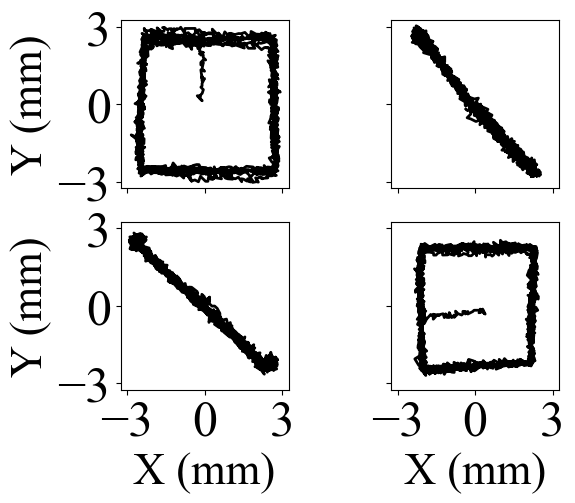

In [17]:
marker_index = [4, 3, 2, 1] 
for i in range(4): 
    plt.subplot(2, 2, marker_index[i]) 
    plt.plot(Y[:, i,0], Y[:, i,1], 'k')

    plt.xticks([-3, 0, 3])
    plt.yticks([-3, 0, 3])
    plt.xlim([-3.25, 3.25],)
    plt.ylim([-3.25, 3.25])

    ax=plt.gca()
    ax.set_aspect(1) 
    if i==0:  
        ax.set_yticklabels(())
        plt.xlabel('X (mm)')
    if i==1: 
        plt.xlabel('X (mm)')
        plt.ylabel('Y (mm)')
    if i==2: 
        ax.set_xticklabels(())
        ax.set_yticklabels(())
    if i==3: 
        ax.set_xticklabels(())
        plt.ylabel('Y (mm)')
          